In [49]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
path = 'sentiment labelled sentences/'

In [26]:
def get_wordcounts(text, vectorizer=None):
    """
    Takes a string or list of strings and returns term frequencies for each word in
    a vectorizer's vocabulary. If no vectorizer is passed, the vocabulary will be generated
    from the input text's unigrams and bigrams.
    """
    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
        vectorizer.fit(text)
    term_counts = zip(vectorizer.get_feature_names(),
        np.asarray(vectorizer.transform(text).sum(axis=0)).ravel())
    return sorted(term_counts, key=lambda x: x[1], reverse=True)

def get_tfidf_weights(text, vectorizer=None):
    if vectorizer is None:
        vectorizer = TfidfVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
        vectorizer.fit(text)
    tfidf_weights = zip(vectorizer.get_feature_names(),
        np.asarray(vectorizer.transform(text).sum(axis=0)).ravel())
    return sorted(tfidf_weights, key=lambda x: x[1], reverse=True)

In [187]:
amz_df = pd.read_csv(path+ 'amazon_cells_labelled.txt', delimiter= '\t')
amz_df.columns = ['text', 'target']

amz_df['target'] = pd.to_numeric(amz_df['target'])
amz_df = amz_df.dropna()

In [188]:
X_train, X_test, y_train, y_test = train_test_split(amz_df.text, amz_df.target, test_size=0.2, random_state=42)

In [189]:
amz_df_train = pd.DataFrame({'text': X_train, 'target':y_train})

amz_df_pos = amz_df_train[(amz_df_train.target == 1)]
amz_df_neg = amz_df_train[(amz_df_train.target == 0)]

In [190]:
def get_tfidf(text):
    tfidf_vec = TfidfVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
    tfidf_vec.fit(text)

    train_tfidf = get_tfidf_weights(text, tfidf_vec)[:40]
    return train_tfidf

In [191]:
def get_counts(text):
    count_vec = CountVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
    
    count_vec.fit(text)
    train_counts = get_wordcounts(text, count_vec)[:40]
    return train_tfidf

In [192]:
pos_words = [word_score[0] for word_score in get_tfidf(amz_df_pos.text)]
neg_words = [word_score[0] for word_score in get_tfidf(amz_df_neg.text)]
neg_words2 = [word_score[0] for word_score in get_counts(amz_df_neg.text)]
neg_words = list(set(neg_words + neg_words2))

pos_words = [word for word in pos_words if word not in neg_words]      

In [193]:
pos_words.remove('cell')

In [194]:
d = {word:[] for word in pos_words}

for word in d.keys():
    d[word]= [1 if word in comment.lower() else 0 for comment in amz_df_train.text]
    
df_train = pd.DataFrame(d)
df_train['target'] = amz_df_train.target

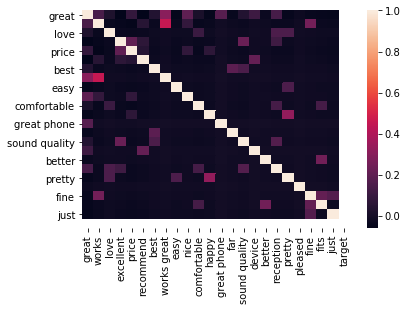

In [195]:
sns.heatmap(df_train[(df_train.target == 1)].corr())

In [196]:
df_train = df_train.dropna()

In [197]:
d = {word:[] for word in pos_words}
for word in d.keys():
    d[word]= [1 if word in comment.lower() else 0 for comment in X_test]
    
df_test = pd.DataFrame(d)

In [198]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(df_train[pos_words], df_train.target)

y_pred = bnb.predict(df_test)

print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))

Number of mislabeled points out of a total 200 points : 82


In [183]:
for ik in range(len(y_train)):
    print(y_train[ik], X_train[ik])

1 Good case, Excellent value.
1 Great for the jawbone.
0 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
1 The mic is great.
0 I have to jiggle the plug to get it to line up right to get decent volume.
0 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
1 If you are Razr owner...you must have this!
0 Needless to say, I wasted my money.
0 What a waste of money and time!.
1 And the sound quality is great.


KeyError: 10

In [39]:
count_vec = CountVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
count_vec.fit(amz_df_neg.text)

tfidf_vec = TfidfVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
tfidf_vec.fit(amz_df_neg.text)

train_counts = get_wordcounts(amz_df_neg.text, count_vec)[:10]
train_tfidf = get_tfidf_weights(amz_df_neg.text, tfidf_vec)[:10]